In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import random

from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.model_selection import train_test_split

import seaborn as sns

MODEL_FILE = 'olive_model_params.npz'
DATA_FILE = 'olive_data.npz'

In [2]:
def sigmoid(z):
    """
    Sigmoid function to map any real value into the (0, 1) interval.
    
    :param z: Input value or array.
    """

    return 1 / (1 + np.exp(-z))

In [3]:
def initialize_parameters(dim: int):
    """
    Docstring for initialize_parameters
    
    :param dim: Description
    :type dim: int
    """

    w = np.zeros((dim, 1))
    b = 0.0

    return w, b


In [4]:
def propagate(w: np.ndarray, b: float, X: np.ndarray, Y: np.ndarray, eps: float = 1e-12):
    """
    Docstring for propogate
    
    :param w: Description
    :type w: np.ndarray
    :param b: Description
    :type b: float
    :param X: Description
    :type X: np.ndarray
    :param y: Description
    :type y: np.ndarray
    """

    n = Y.shape[0] # 2000 samples

    # 1. Forward Propogation
    Y_hat = sigmoid(np.dot(X, w) + b)
    Y_hat_clipped = np.clip(Y_hat, eps, 1 - eps)


    # 2. Compute cost
    cost = (-1/n) * np.sum(Y * np.log(Y_hat_clipped) + (1-Y) * np.log(1-Y_hat_clipped))

    residuals = Y_hat - Y
    XTransposed = np.transpose(X)

    dw = (1/n) * (np.dot(XTransposed, residuals))
    db = (1/n) * np.sum(residuals)

    return Y_hat, cost, dw, db 


In [5]:
def optimize(w: np.ndarray, b: float, X: np.ndarray, Y: np.ndarray, num_iterations: int, learning_rate: float, print_every: int = 100):
  costs = []

  for i in range(num_iterations):
    # 1. Calculate gradient and cost
    Y_hat, cost, dw, db = propagate(w, b, X, Y)

    # 2. Update parameters (Learning)
    w = w - learning_rate * dw
    b = b - learning_rate * db
    
    if (np.isnan(cost) or np.isinf(cost)):
      print(f"Cost is {cost} at iteration {i}, stopping optimization.")
      break
    
    costs.append(cost)

    if i % print_every == 0:
      print(f"Cost after iteration {i}: {cost}")

  return w, b, costs


In [6]:
def predict(w: np.ndarray, b: float, X: np.ndarray):
  """
  Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
  """

  Y_hat = sigmoid(np.dot(X, w) + b)

  Y_prediction = (Y_hat > 0.5).astype(int)

  return Y_prediction
  

In [7]:
def train_once(X: np.ndarray, Y: np.ndarray, learning_rate: float, num_iterations: int):
  """
  Trains the logistic regression model on the provided data once.
  """

  dim = X.shape[1] # number of features
  w, b = initialize_parameters(dim)
  w, b, costs = optimize(w, b, X, Y, num_iterations, learning_rate)

  return w, b, costs

In [8]:
def train_model(x_train: np.ndarray, y_train: np.ndarray, learning_rate, num_iterations: int):
  """
  Trains the logistic regression model and prints the training accuracy.
  """

  w, b, costs = train_once(x_train, y_train, learning_rate=learning_rate, num_iterations=num_iterations)

  np.savez(MODEL_FILE, w=w, b=b)
  print(f"Model saved to {MODEL_FILE}")

  predictions = predict(w, b, x_train)
  print(f"Train accuracy: {100 - np.mean(np.abs(predictions - y_train)) * 100}")

  return w, b, costs

In [9]:

def train_or_load_model(X: np.ndarray, y: np.ndarray, learning_rate: float = 0.001, num_iterations: int = 10000):
    # Check if the model is stored
    if os.path.exists(MODEL_FILE):
        print("Loading model parameters from file.")
        data = np.load(MODEL_FILE)
        w = data['w']
        b = data['b']
        return w, b, []
    
    else:
        print("No saved model found. Starting training (this might take a while)...")
                
        return train_model(X, y, learning_rate=learning_rate, num_iterations=num_iterations)

In [10]:
def evaluate_model(w: np.ndarray, b: float, X_train: np.ndarray, y_train: np.ndarray, X_test: np.ndarray, y_test: np.ndarray):
    train_predictions = predict(w, b, X_train)
    train_accuracy = 100 - np.mean(np.abs(train_predictions - y_train)) * 100

    test_predictions = predict(w, b, X_test)
    test_accuracy = 100 - np.mean(np.abs(test_predictions - y_test)) * 100
    
    print(f"Train accuracy: {train_accuracy:.2f} %")
    print(f"Test accuracy: {test_accuracy:.2f} %")

In [11]:
def plot_learning_curve(costs, learning_rate=0.005):
    costs = np.squeeze(costs)

    plt.plot(costs)
    plt.ylabel('Cost')
    plt.xlabel('Iterations (per hundreds)')
    plt.title('Learning rate = ' + str(learning_rate))
    plt.show()

Loaded X shape: (1600, 26756)
Loaded y shape: (1600, 1)
No saved model found. Starting training (this might take a while)...
Cost after iteration 0: 0.6931471805599452
Cost after iteration 100: 0.5527747459610578
Cost after iteration 200: 0.4926754347531461
Cost after iteration 300: 0.45252091817140583
Cost after iteration 400: 0.4224908543000022
Cost after iteration 500: 0.3985320764517033
Cost after iteration 600: 0.3786299189865156
Cost after iteration 700: 0.3616391320792006
Cost after iteration 800: 0.34684243991992253
Cost after iteration 900: 0.333758366131682
Cost after iteration 1000: 0.32204711405852726
Cost after iteration 1100: 0.311459756443903
Cost after iteration 1200: 0.3018085799932079
Cost after iteration 1300: 0.292948689321065
Cost after iteration 1400: 0.2847660427481353
Cost after iteration 1500: 0.2771693769507739
Cost after iteration 1600: 0.27008459158049497
Cost after iteration 1700: 0.2634507473291336
Cost after iteration 1800: 0.25721715389577
Cost after ite

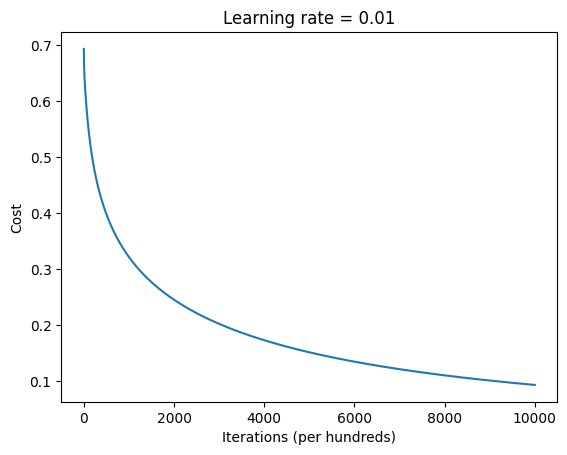

Train accuracy: 99.06 %
Test accuracy: 84.75 %


In [12]:
data = np.load(DATA_FILE)

X_train = data['X_train']
X_test = data['X_test']
y_train = data['y_train']
y_test = data['y_test']

y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

print(f"Loaded X shape: {X_train.shape}")
print(f"Loaded y shape: {y_train.shape}")

learning_rate = 0.01
num_iterations = 10000


w, b, costs = train_or_load_model(X_train, y_train, learning_rate, num_iterations)

# w, b, costs = train_or_load_model(X_train, y_train, learning_rate=0.0001, num_iterations=10000)
plot_learning_curve(costs, learning_rate=learning_rate)

evaluate_model(w, b, X_train, y_train, X_test, y_test)

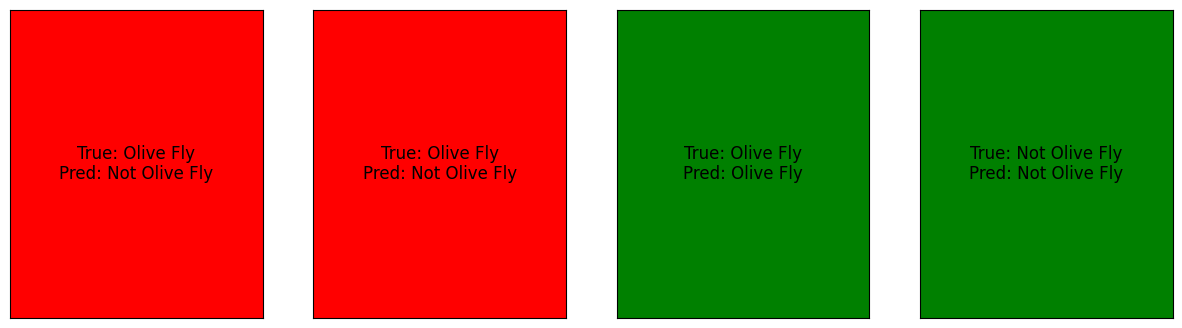

In [13]:
fig, axes = plt.subplots(1, 4, figsize=(15, 4))

for ax in axes:
    idx = random.randint(0, X_test.shape[0] - 1)
    x_sample = X_test[idx].reshape(1, -1)
    true_label = y_test[idx, 0]

    predicted_label = predict(w, b, x_sample)[0, 0]

    label_name = "Olive Fly" if predicted_label == 1 else "Not Olive Fly"
    pred_name = "Olive Fly" if true_label == 1 else "Not Olive Fly"

    # Since we only have features (X), we can't show the original image easily 
    # unless we saved it, so we just show the text result.
    ax.text(0.5, 0.5, f"True: {label_name}\nPred: {pred_name}", 
            fontsize=12, ha='center', va='center')
    
    color = 'green' if true_label == predicted_label else 'red'
    ax.set_facecolor(color)
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()



--- Detailed Evaluation Metrics ---

               precision    recall  f1-score   support

Not Olive Fly       0.84      0.85      0.85       199
    Olive Fly       0.85      0.84      0.85       201

     accuracy                           0.85       400
    macro avg       0.85      0.85      0.85       400
 weighted avg       0.85      0.85      0.85       400

True Negatives: 170, False Positives: 29, False Negatives: 32, True Positives: 169


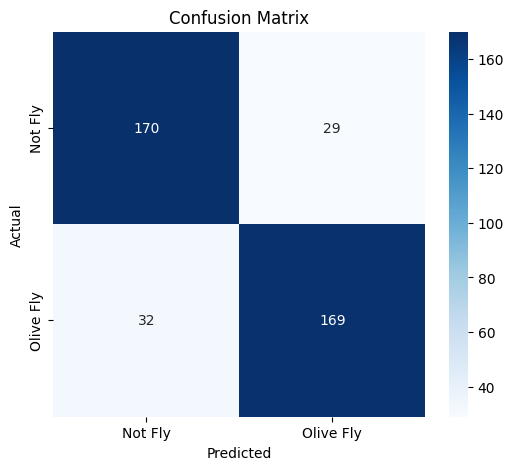

F1 Score: 0.8471


In [14]:
y_pred = predict(w, b, X_test)

print("\n--- Detailed Evaluation Metrics ---\n")
print(classification_report(y_test, y_pred, target_names=["Not Olive Fly", "Olive Fly"]))

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

print(f"True Negatives: {tn}, False Positives: {fp}, False Negatives: {fn}, True Positives: {tp}")

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=["Not Fly", "Olive Fly"], 
            yticklabels=["Not Fly", "Olive Fly"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")